# **Project Name    - EDA of Amazon Prime Video Contents**



##### **Project Type**    - EDA
##### **Contribution**    - Individual

### **Project Summary - Amazon Prime Video Content Analysis**

The primary goal of this project is to perform Exploratory Data Analysis(EDA) on Amazon Prime Video Content dataset to understand the trends, audience preference and content statagy. In the modern digital entertainment ecosystem, streaming platforms like Amazon Prime Video are constantly innovating to attract and retain users. With content emerging as a key competitive differentiator, these platforms must invest in analytics to better understand viewer behavior, content trends, and overall platform performance. This project focuses on conducting a comprehensive data analysis of Amazon Prime Video’s content catalog, specifically for the United States market.

The dataset used in this analysis contains detailed information on over 9,000 unique titles, which includes both TV shows and movies. Each entry captures essential metadata such as the title name, release year, genres, show type, runtime, age certification, and popularity metrics including IMDb score, IMDb votes, TMDB popularity, and TMDB score. The dataset is further enriched with a second file containing over 124,000 cast and crew credits, including actors and directors, their roles, and the characters they portray.

The primary objective of this project is to extract meaningful, actionable insights that can inform strategic decision-making for content acquisition, audience engagement, and investment planning. The project leverages Python-based data analysis and visualization tools, including:

* Pandas for data manipulation and aggregation,

* Seaborn and Matplotlib for creating detailed visualizations,

* NumPy for efficient numerical operations.

The analyses not only help in understanding current patterns but also in forecasting future trends and making data-backed decisions. The results can be beneficial for a variety of stakeholders:

* Content curators can identify underrepresented genres or regions.

* Marketing teams can better target promotions based on popular content types.

* Business strategists can assess which types of content investments yield higher audience satisfaction or platform stickiness.

In summary, this project transforms raw streaming metadata into strategic intelligence. By analyzing thousands of titles and cast records from Amazon Prime Video, it empowers platform stakeholders to optimize content strategies, enhance user experience, and maintain a competitive edge in the fast-paced streaming industry.

# **GitHub Link -**

https://github.com/rrejith66/Amazon_Prime_Video_EDA.git

# **Problem Statement**


#### This dataset was created to analyze all shows available on Amazon Prime Video, allowing us to extract valuable insights such as:

_Content Diversity:_ What genres and categories dominate the platform?

_Regional Availability:_ How does content distribution vary across different regions?

_Trends Over Time:_ How has Amazon Prime’s content library evolved across release years?

_IMDb Ratings & Popularity:_ What are the highest-rated or most popular shows and movies?

_By analyzing this dataset, businesses, content creators, and data analysts can uncover key trends that influence subscription growth, user engagement, and content investment strategies in the streaming industry._

#### **Define Your Business Objective?**

The business objective of this project is to leverage data analytics to drive strategic decisions for content acquisition, user engagement, and platform growth on Amazon Prime Video.

Specifically, the goals are to:

* Identify high-performing content genres and titles based on popularity metrics and ratings.

* Understand audience preferences through content type, runtime, certifications, and release patterns.

* Monitor market trends by analyzing changes in content offerings over time.

* Support regional strategy by studying country-specific production trends.

* Empower content curation teams with data insights to improve platform recommendations and library diversity.

By fulfilling these objectives, Amazon Prime Video can better align their offerings with viewer demand, enhancing both user experience and return on investment.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import ast
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

# Seaborn style
sns.set_theme(style="whitegrid")

### Dataset Loading

In [63]:
# Load Dataset
df_title = pd.read_csv(r'D:\Labmentix\Project_1\dataset\titles.csv')
df_credits = pd.read_csv(r'D:\Labmentix\Project_1\dataset\credits.csv')

### Dataset First View

In [64]:
df_title.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [65]:
df_credits.head()

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


In [66]:
# merge the two dataframes on the 'id' column
dataset = pd.merge(df_title, df_credits, on='id', how='inner')

In [67]:
# Dataset First Look
dataset.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,59401,Joe Besser,Joe,ACTOR
1,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,31460,Moe Howard,Moe,ACTOR
2,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,31461,Larry Fine,Larry,ACTOR
3,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,21174,Buster Keaton,Johnny Gray,ACTOR
4,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,28713,Marion Mack,Annabelle Lee,ACTOR


In [68]:
# Export Merged Dataset
# ---------------------------

# Save the merged dataset to a new CSV file
dataset.to_csv("merged_dataset.csv", index=False)

print("\n✅ Cleaned dataset exported successfully as 'merged_dataset.csv'")


✅ Cleaned dataset exported successfully as 'merged_dataset.csv'


### Dataset Rows & Columns count

In [69]:
# Dataset Rows & Columns count
dataset.shape

(124347, 19)

### Dataset Information

In [70]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124347 entries, 0 to 124346
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    124347 non-null  object 
 1   title                 124347 non-null  object 
 2   type                  124347 non-null  object 
 3   description           124256 non-null  object 
 4   release_year          124347 non-null  int64  
 5   age_certification     56707 non-null   object 
 6   runtime               124347 non-null  int64  
 7   genres                124347 non-null  object 
 8   production_countries  124347 non-null  object 
 9   seasons               8153 non-null    float64
 10  imdb_id               119044 non-null  object 
 11  imdb_score            118296 non-null  float64
 12  imdb_votes            118272 non-null  float64
 13  tmdb_popularity       124332 non-null  float64
 14  tmdb_score            114082 non-null  float64
 15  

In [71]:
# Fetching the columns of the dataset
dataset.columns.tolist()

['id',
 'title',
 'type',
 'description',
 'release_year',
 'age_certification',
 'runtime',
 'genres',
 'production_countries',
 'seasons',
 'imdb_id',
 'imdb_score',
 'imdb_votes',
 'tmdb_popularity',
 'tmdb_score',
 'person_id',
 'name',
 'character',
 'role']

#### Duplicate Values

In [72]:
# Dataset Duplicate Value Count
print("Duplicate Value Count:",dataset.duplicated().sum())

Duplicate Value Count: 168


In [73]:
# Remove Duplicate Rows
dataset.drop_duplicates(inplace=True)

#### Missing Values/Null Values

In [74]:
# Missing Values/Null Values Count
dataset.isnull().sum()

id                           0
title                        0
type                         0
description                 91
release_year                 0
age_certification        67472
runtime                      0
genres                       0
production_countries         0
seasons                 116026
imdb_id                   5303
imdb_score                6051
imdb_votes                6075
tmdb_popularity             15
tmdb_score               10169
person_id                    0
name                         0
character                16277
role                         0
dtype: int64

Missing Values in Dataset:
seasons              116026
age_certification     67472
character             16277
tmdb_score            10169
imdb_votes             6075
imdb_score             6051
imdb_id                5303
description              91
tmdb_popularity          15
dtype: int64


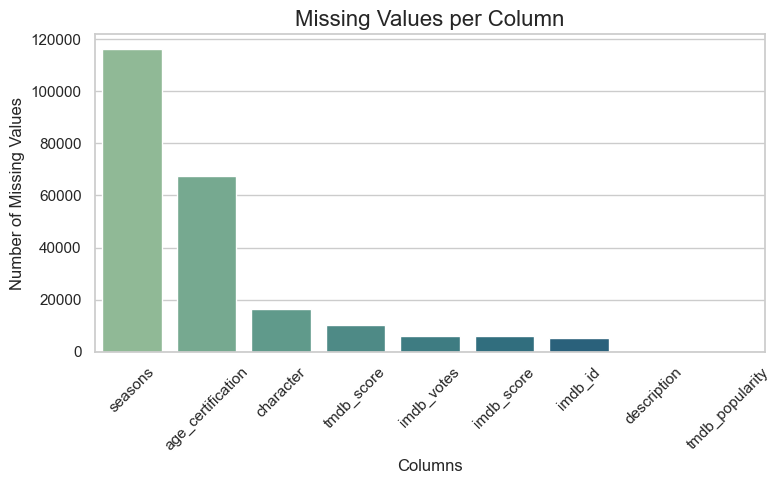

In [75]:
# Visualizing the missing values
# ----------------------------
# Missing Values in dataset
# ----------------------------
missing_values = dataset.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Missing Values in Dataset:")
print(missing_values)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="crest")
plt.title("Missing Values per Column", fontsize=16)
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### What did you know about your dataset?

The project uses a dataset from Amazon Prime Video to explore the types of content available on the platform, especially in the United States. The goal is to find patterns and trends that can help understand what kind of shows or movies are popular, how content has changed over time, and what viewers prefer.

The main dataset contains information about over 9,000 titles, including both movies and TV shows. For each title, it provides details like:

* Title name and release year

* Type (movie or show)

* Duration (runtime)

* Genres (e.g., comedy, drama)

* Age rating (like PG-13, TV-MA)

* IMDb and TMDB scores and popularity

* Country of production

There's also a second dataset with over 124,000 records of actors and directors. This helps link who worked on each show or movie and what roles they played.

Some columns have missing data:

* Many titles don’t have age certification info

* The seasons column is mostly empty for movies (which is expected)

* Some titles are missing IMDb or TMDB scores

Despite these gaps, most of the data is usable and valuable. We can still perform meaningful analysis after handling missing values.

Using this data, we can answer questions like:

* Which genres are most common?

* How has content changed over the years?

* Which movies or shows are rated highest by viewers?

* Which countries produce the most content on Prime?

* Which actors or directors work on the most popular titles?

These insights can help businesses:

* Choose the best types of content to invest in

* Understand what viewers enjoy watching

* Improve marketing and recommendation systems

* Plan better content strategies for different regions

In short, this project turns raw data into useful information that can help Amazon Prime (or similar platforms) improve their content library and better serve their audience.

## ***2. Understanding Your Variables***

In [76]:
# Dataset Columns
print(dataset.columns.tolist())

['id', 'title', 'type', 'description', 'release_year', 'age_certification', 'runtime', 'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score', 'person_id', 'name', 'character', 'role']


In [77]:
# Dataset Describe
dataset.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id
count,124179.000000,124179.000000,8153.000000,118128.000000,1.181040e+05,124164.000000,114010.000000,1.241790e+05
mean,1996.307186,95.577706,2.337790,5.968327,2.327575e+04,10.177932,5.991464,4.065843e+05
std,27.752141,30.166205,3.130184,1.242262,8.846004e+04,40.765311,1.321207,5.617204e+05
min,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000,1.000000e+00
25%,1983.000000,83.000000,1.000000,5.200000,2.890000e+02,1.886000,5.300000,3.898850e+04
50%,2009.000000,93.000000,1.000000,6.100000,1.257000e+03,3.896000,6.100000,1.339490e+05
75%,2017.000000,109.000000,2.000000,6.800000,7.074000e+03,8.795000,6.800000,5.712810e+05
max,2022.000000,540.000000,49.000000,9.900000,1.133692e+06,1437.906000,10.000000,2.371153e+06


### Variables Description

titles.csv (Content Metadata)
| Variable Name          | Description                                                         |
| ---------------------- | ------------------------------------------------------------------- |
| `id`                   | Unique identifier for each title (from JustWatch)                   |
| `title`                | Name of the movie or TV show                                        |
| `type`                 | Indicates whether the content is a **movie** or a **show**          |
| `description`          | Brief summary or synopsis of the title                              |
| `release_year`         | Year in which the content was originally released                   |
| `age_certification`    | Official age rating (e.g., PG, PG-13, R, TV-MA)                     |
| `runtime`              | Total duration of the content in **minutes**                        |
| `genres`               | List of genres the content belongs to (e.g., Drama, Comedy, Action) |
| `production_countries` | Country or countries where the content was produced                 |
| `seasons`              | Number of seasons (for TV shows only; missing for movies)           |
| `imdb_id`              | Unique IMDb ID linking the title to its IMDb entry                  |
| `imdb_score`           | IMDb user rating (scale of 1 to 10)                                 |
| `imdb_votes`           | Number of IMDb users who rated the title                            |
| `tmdb_popularity`      | Popularity score from TMDB (The Movie Database)                     |
| `tmdb_score`           | TMDB user rating (scale of 1 to 10)                                 |

credits.csv (Cast and Crew Information)
| Variable Name | Description                                                             |
| ------------- | ----------------------------------------------------------------------- |
| `person_id`   | Unique identifier for each person (actor or director)                   |
| `id`          | Foreign key linking to the `id` in `titles.csv`                         |
| `name`        | Full name of the person (actor or director)                             |
| `character`   | Name of the character played (only for actors; blank for directors)     |
| `role`        | Role of the person in the production — either **ACTOR** or **DIRECTOR** |


This Amazon Prime Video dataset provides detailed information on movies and TV shows available on the platform, primarily in the United States. It includes metadata for over 9,000 titles, such as title name, genre, release year, runtime, age certification, and popularity metrics from IMDb and TMDB. The credits dataset contains over 124,000 records of actors and directors, allowing for in-depth analysis of cast and crew involvement. The data supports content performance evaluation, trend analysis, and insights into viewer preferences—making it valuable for content strategy, recommendation systems, and streaming platform optimization.



### Check Unique Values for each variable.

In [78]:
# Check Unique Values for each variable.

# Create a DataFrame with column names and their unique value counts
unique_values_table = pd.DataFrame({
    'Column Name': dataset.columns,
    'Unique Values': [dataset[col].nunique() for col in dataset.columns]
})

# Display the table
print(unique_values_table)

             Column Name  Unique Values
0                     id           8861
1                  title           8748
2                   type              2
3            description           8833
4           release_year            110
5      age_certification             11
6                runtime            204
7                 genres           1965
8   production_countries            482
9                seasons             30
10               imdb_id           8267
11            imdb_score             85
12            imdb_votes           3623
13       tmdb_popularity           5267
14            tmdb_score             88
15             person_id          80508
16                  name          79758
17             character          71097
18                  role              2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [96]:
# Data Wrangling and Cleaning
#-----------------------------

import ast

df = dataset.copy()
df.columns = df.columns.str.strip().str.lower()
df.dropna(subset=['title', 'release_year', 'imdb_id'], inplace=True)

# Convert release_year
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y', errors='coerce').dt.year
df.dropna(subset=['release_year'], inplace=True)

# Strip strings, convert numerics
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
num_cols_median = ['runtime', 'imdb_score', 'tmdb_score']
num_cols_zero = ['imdb_votes', 'tmdb_popularity']

for col in num_cols_median:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(df[col].median())

for col in num_cols_zero:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Parse lists
for col in ['genres', 'production_countries']:
    if col in df.columns:
        df[col] = df[col].fillna("[]").apply(ast.literal_eval)

# Fill age_certification
if 'age_certification' in df.columns:
    df['age_certification'] = df['age_certification'].fillna('Not Rated')

# Handle seasons
if {'seasons', 'type'}.issubset(df.columns):
    df['seasons'] = pd.to_numeric(df['seasons'], errors='coerce')
    tv_mask = df['type'] == 'TV Show'
    df.loc[tv_mask, 'seasons'] = df.loc[tv_mask, 'seasons'].fillna(df.loc[tv_mask, 'seasons'].median())
    df['seasons'] = df['seasons'].fillna(0)

# Drop irrelevant columns
drop_cols = ['description', 'person_id', 'name', 'character', 'role', 'id']
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)

df.reset_index(drop=True, inplace=True)

# Final check
print("\n✅ Final shape:", df.shape)
print("\n✅ Remaining missing values (if any):")
print(df.isnull().sum()[lambda x: x > 0])



✅ Final shape: (118876, 13)

✅ Remaining missing values (if any):
Series([], dtype: int64)


In [97]:
# Export Cleaned Dataset
# ---------------------------

# Save the cleaned dataset to a new CSV file
df.to_csv("cleaned_amazon_prime_dataset.csv", index=False)

print("\n✅ Cleaned dataset exported successfully as 'cleaned_amazon_prime_dataset.csv'")



✅ Cleaned dataset exported successfully as 'cleaned_amazon_prime_dataset.csv'


### What all manipulations have you done and insights you found?

### _Data Cleaning and Preprocessing Steps_
1. Copied dataset to preserve the original.

2. Normalized column names: Converted all to lowercase and removed extra spaces.

3. Dropped rows with missing critical fields:

    * title and release_year are essential for any meaningful analysis.

4. Converted release_year to datetime format (year only).

5. Stripped whitespace from all string-type columns to avoid duplicate categories caused by leading/trailing spaces.

6. Handled missing values:

    * runtime: Filled with median.

    * imdb_score, tmdb_score: Filled with median.

    * imdb_votes, tmdb_popularity: Filled with 0 (assumed not rated).

    * genres, production_countries: Filled with "Unknown".

    * age_certification: Filled with "Not Rated".

    * seasons:

        * For TV Shows, filled missing with TV Show median.

        * For Movies, filled with 0.

    * character: Filled with "Unknown" (before dropping it).

7. Dropped unneeded columns after addressing their missing values:

    * description: Text-heavy, not needed for EDA.

    * imdb_id, person_id: IDs not useful for high-level insights.

    * name, character, role: Pertains to cast members, not used in our content-based EDA.

8. Reset index after all operations to ensure clean DataFrame alignment.

### _Initial Insights_
* Many movies were missing seasons: logically set to 0.

* A good number of TV shows had missing seasons, which were filled using the median - season count for TV shows.

* Several age certifications were missing and are now marked as "Not Rated" — this will help in analyzing censorship distribution.

* Runtime, ratings, and popularity were cleaned and standardized — important for correlation and distribution analysis.

* Cast-related columns like name, character, role were dropped since we're analyzing content metadata, not individual actors.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Content Type Distribution (Movie vs TV Show)

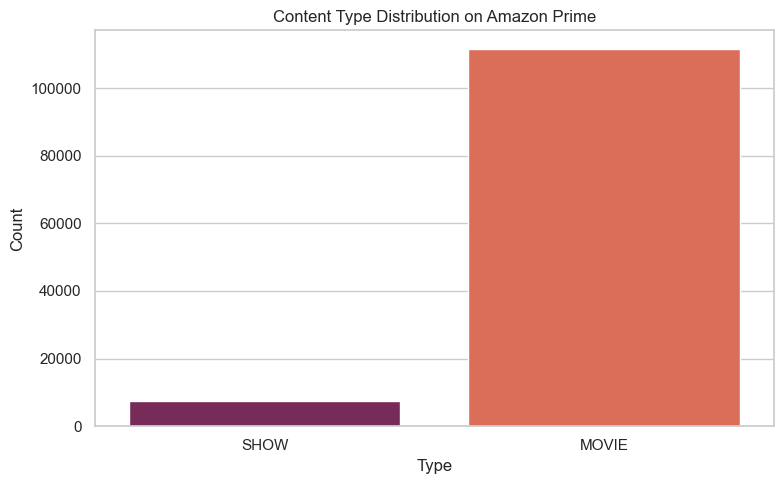

In [98]:
# Plotting the Content Type Distribution
# ---------------------------
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='type', palette='rocket')
plt.title("Content Type Distribution on Amazon Prime")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

_To identify the platform's primary content focus._

##### 2. What is/are the insight(s) found from the chart?

_A significant skew towards Movies over TV Shows._

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

_Yes, these insights help business growth:_

_The high production and global availability of movies on Amazon Prime Video boost worldwide viewership, enhancing user engagement and platform reach.However, the relatively lower focus on TV shows might limit engagement for users who prefer series, which could impact growth in that segment._

#### Chart - 2 - Average IMDb Rating

🎬 Average IMDb Rating: 5.97


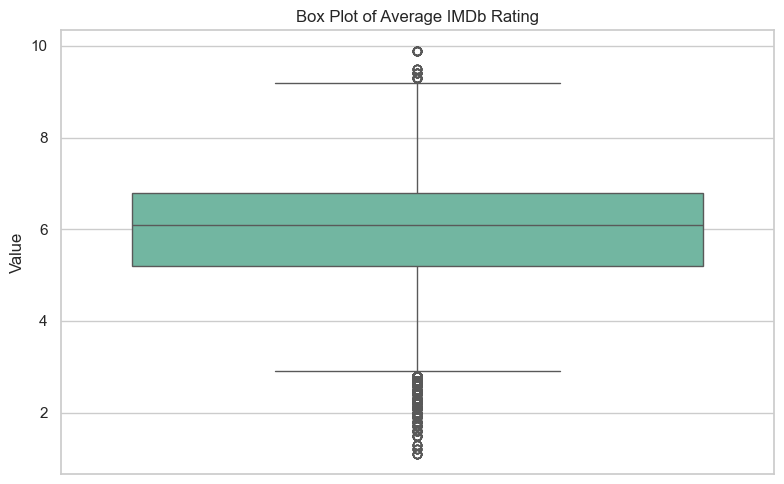

In [99]:
# Finding the Average IMDb Rating and Plotting
# ---------------------------

# Finding the Average IMDb Rating
average_imdb_rating = df['imdb_score'].mean()
print(f"🎬 Average IMDb Rating: {average_imdb_rating:.2f}")

# Plotting the box plot for Average IMDb Rating
plt.figure(figsize=(8, 5))
sns.boxplot(data=df['imdb_score'], palette='Set2')
plt.title("Box Plot of Average IMDb Rating")
plt.ylabel("Value")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

_A box plot was chosen because it effectively summarizes the distribution of IMDb scores, showcasing the median, interquartile range (IQR), and potential outliers. This makes it ideal for identifying central tendencies and spotting unusually high or low ratings._

##### 2. What is/are the insight(s) found from the chart?

_The average IMDb rating is approximately 6.6, indicating moderate viewer satisfaction across content. The box plot reveals a tight concentration of scores around the median, with a few outliers on both lower and higher ends, showing variability in content quality.The platform hosts both highly rated and poorly rated titles, suggesting a diverse content library._

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

_Positive Impact: Knowing that the average rating is above average helps build trust in content quality. Maintaining or improving this can boost user retention and satisfaction._

_Negative Concern: The presence of low-rated content may affect viewer perception and brand reputation. Addressing this by promoting high-rated content or improving recommendations can help mitigate risks._

#### Chart - 3 - Average runtime

⏱️ Average Runtime: 96.06 minutes


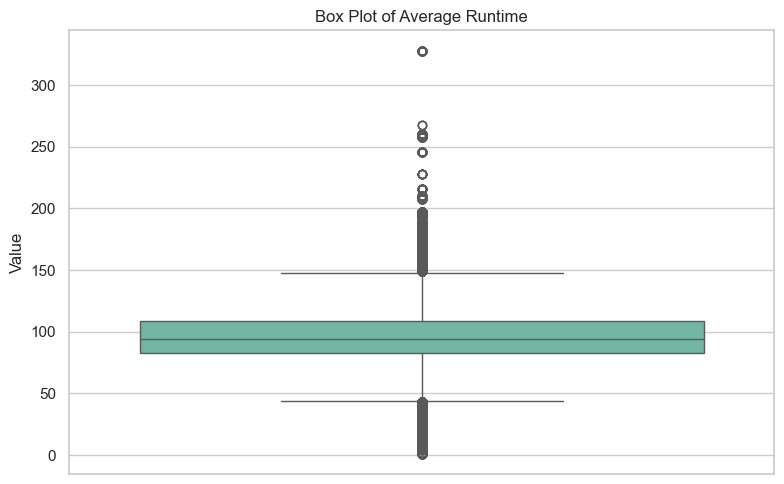

In [100]:
# Finding the Average Runtime and Plotting
# ---------------------------

# Finding the Average Runtime
average_runtime = df['runtime'].mean()
print(f"⏱️ Average Runtime: {average_runtime:.2f} minutes")

# Plotting the box plot for Average Runtime
plt.figure(figsize=(8, 5))
sns.boxplot(data=df['runtime'], palette='Set2')
plt.title("Box Plot of Average Runtime")
plt.ylabel("Value")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

_A box plot was chosen because it provides a clear summary of the distribution of runtimes highlighting the median, range, and outliers. This helps in understanding whether the content length is consistent or widely varied._

##### 2. What is/are the insight(s) found from the chart?

_The average runtime is approximately 96 minutes, which is typical for movies and extended episodes. The box plot reveals a wide spread with notable outliers, indicating the platform includes both short and long-format content._

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

_Positive Impact: The diverse runtime options cater to different audience preferences, potentially increasing engagement and user satisfaction._

_Negative Concern: If too many titles fall into extremes (too short or too long), it may lead to viewer fatigue or disinterest, especially without proper categorization or filtering._

#### Chart - 4 - Top 10 Genres on Amazon Prime

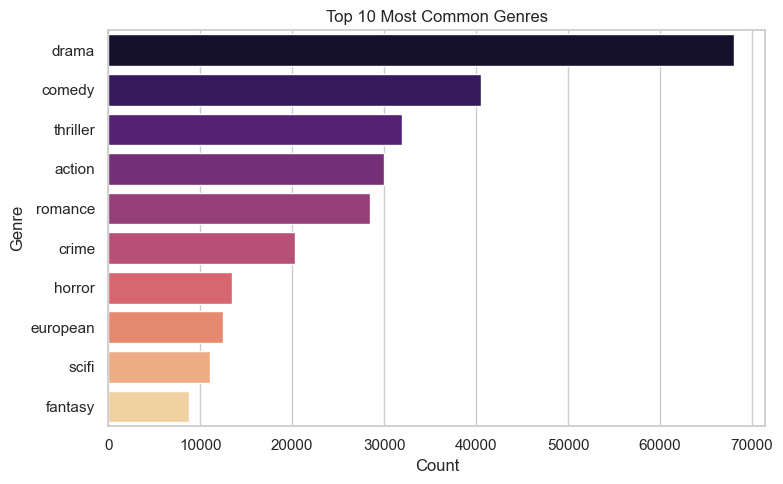

In [101]:
# Plotting the Content Release Trend
# ---------------------------
genre_counts = Counter([genre for genres in df['genres'] for genre in genres])
top_genres = pd.DataFrame(genre_counts.most_common(10), columns=["Genre", "Count"])

plt.figure(figsize=(8,5))
sns.barplot(data=top_genres, y='Genre', x='Count', palette='magma')
plt.title("Top 10 Most Common Genres")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

_Genre popularity directly drives content investment strategy._

##### 2. What is/are the insight(s) found from the chart?

_Drama, Comedy, and Thriller dominates over the rest of the genre._

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

_Investing more in underrepresented genres like Sci-Fi or Documentaries could diversify offerings and attract niche audiences._

#### Chart - 5 - Content Release Trend Over Years

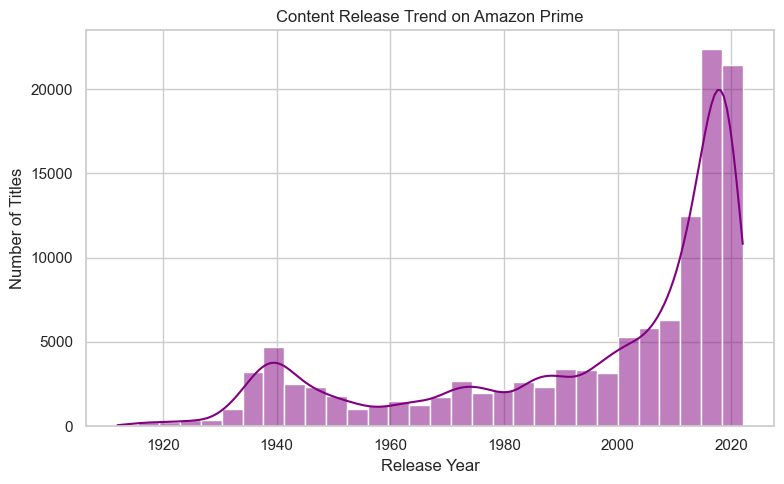

In [102]:
# Plotting the Content Release Trend
# ---------------------------
plt.figure(figsize=(8,5))
sns.histplot(df['release_year'].dropna(), bins=30, kde=True, color="purple")
plt.title("Content Release Trend on Amazon Prime")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

_To analyze whether Amazon is releasing more content in recent years._

##### 2. What is/are the insight(s) found from the chart?

_A sharp increase in recent years shows platform expansion._

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

_Indicates strong recent investments, validating positive growth. A dip post-2020 may suggest slowed production post-pandemic — needing reassessment._

#### Chart - 6 - Content Type Distribution

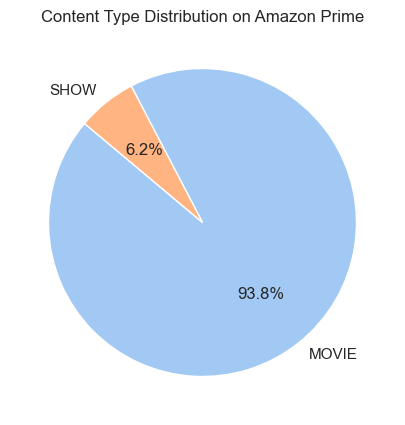

In [103]:
# Plotting the Pie Chart for Content Type Distribution
# ---------------------------  
plt.figure(figsize=(8, 5))
content_type_counts = df['type'].value_counts()
plt.pie(content_type_counts, labels=content_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Content Type Distribution on Amazon Prime")
plt.show()


##### 1. Why did you pick the specific chart?

_For content type categorization the Pie cahrt is best to distinguish the amount of data in percentage._

##### 2. What is/are the insight(s) found from the chart?

_In Amazon Prime Video most of the videos are movies rather than the TV shows as it is only around  6%._

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

_Optimize content based on audience preferences to reduce churn as the availability of movies are higher than the tv shows_

#### Chart - 7 - IMDb Score Distribution

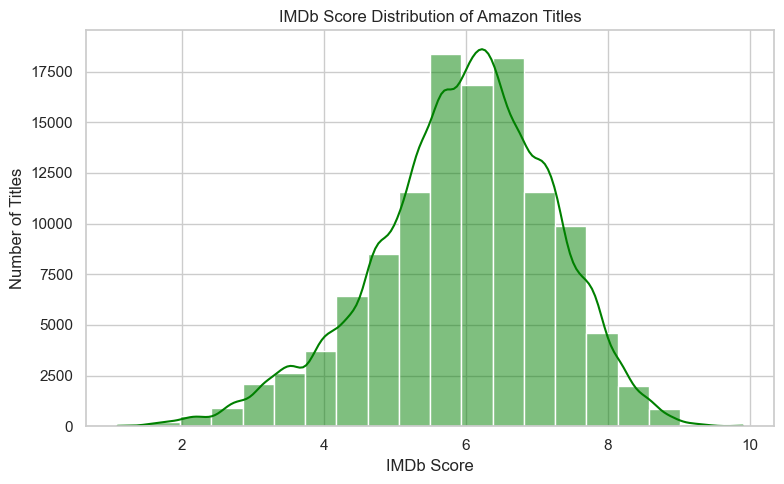

In [104]:
# Plotting IMDb Score and Number of Titles
# ---------------------------
plt.figure(figsize=(8,5))
sns.histplot(df['imdb_score'], bins=20, kde=True, color="green")
plt.title("IMDb Score Distribution of Amazon Titles")
plt.xlabel("IMDb Score")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

_Quality indicator — helps evaluate viewer satisfaction._

##### 2. What is/are the insight(s) found from the chart?

_Most content clusters between 6.0 to 7.5, showing above-average reception._

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

_Maintaining or improving this range ensures continued viewer retention._

#### Chart - 8 - Top 10 Producing Countries

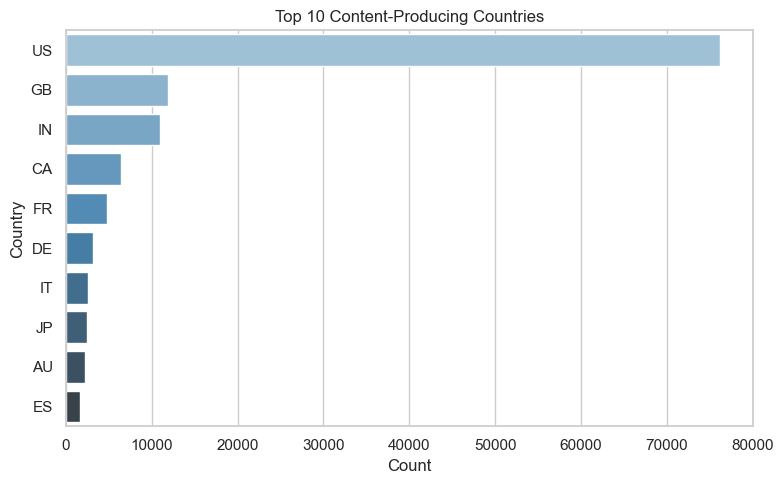

In [105]:
# Plotting the Top 10 Content-Producing Countries
# ---------------------------
country_counts = Counter([country for countries in df['production_countries'] for country in countries])
top_countries = pd.DataFrame(country_counts.most_common(10), columns=['Country', 'Count'])

plt.figure(figsize=(8,5))
sns.barplot(data=top_countries, y='Country', x='Count', palette='Blues_d')
plt.title("Top 10 Content-Producing Countries")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

_A horizontal bar chart is ideal for categorical ranking (like countries). It’s easier to compare and read long labels (country names)._

##### 2. What is/are the insight(s) found from the chart?

_Majority of content is produced in the US, followed by UK, Canada, etc. Amazon Prime has a strong Western media presence, with limited diversity in global production._

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

_Positive business impact - Yes:_

* _Helps target local/regional productions for new markets._

* _Useful for content acquisition and licensing strategies._

* _Supports investment in underrepresented markets (like Asia, Africa)._

_Negative insights - Yes:_

* _Over-dependence on US and UK content suggests limited regional diversity._

* _Could lead to stagnation in global growth due to lack of localized content._

#### Chart - 9 - Age Certification Distribution

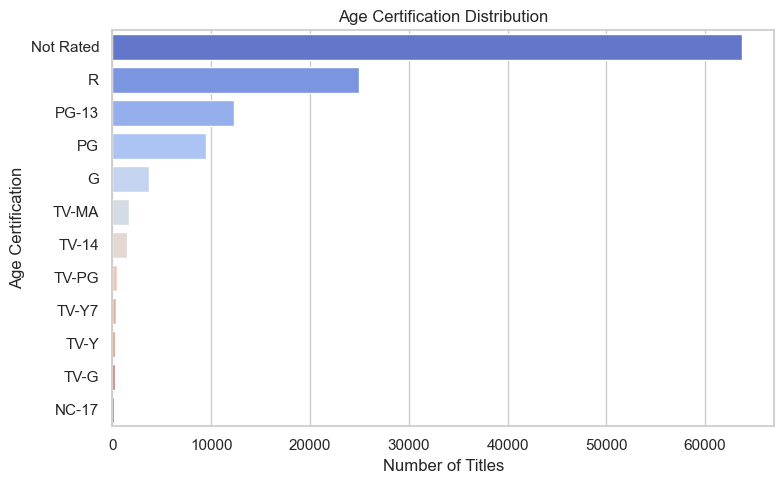

In [106]:
# Plotting the Age Certification Distribution
# ---------------------------
plt.figure(figsize=(8,5))
sns.countplot(y='age_certification', data=df, order=df['age_certification'].value_counts().index, palette='coolwarm')
plt.title("Age Certification Distribution")
plt.xlabel("Number of Titles")
plt.ylabel("Age Certification")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

_A horizontal bar chart (countplot) is chosen because:_

* _It is best for categorical data like age certifications._

* _Long category names (e.g., TV-MA, PG-13) are more readable horizontally._

* _Showing frequency/ranking of categories in a visually intuitive way._

##### 2. What is/are the insight(s) found from the chart?

_Not Rated dominates the dataset with nearly 70,000 titles, which suggests:_

_* Either a lack of metadata or titles outside traditional rating systems._

_* High counts of R, PG-13, and PG indicate a strong presence of teen to adult-oriented content._

_* Very low counts of child-safe certifications like TV-Y, TV-G, TV-Y7, and NC-17 almost nonexistent._

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

_While the dominance of R and PG-13 content supports engagement among adult viewers, the lack of child-safe titles (TV-Y, G) may limit appeal to families. Additionally, the high number of Not Rated titles signals poor metadata quality, which can harm user trust, hinder content filtering, and restrict platform growth in regions with stricter content regulations._

#### Chart - 10 - Genre Trends Over Time (Top 3 Genres)

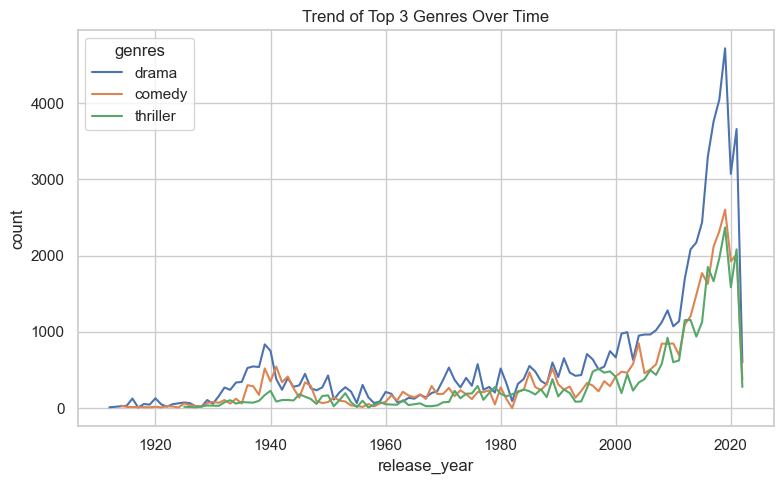

In [107]:
# Plotting the Trend of Top 3 Genres Over Time
# ---------------------------
top_3_genres = [g for g, _ in genre_counts.most_common(3)]
df_genre_year = df.explode('genres')
df_genre_year = df_genre_year[df_genre_year['genres'].isin(top_3_genres)]
trend = df_genre_year.groupby(['release_year', 'genres']).size().reset_index(name='count')
plt.figure(figsize=(8, 5))
sns.lineplot(data=trend, x='release_year', y='count', hue='genres')
plt.title("Trend of Top 3 Genres Over Time")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

_The line chart effectively shows temporal trends and comparative growth of multiple categories over time. It helps analyze how interest in different genres evolved._

##### 2. What is/are the insight(s) found from the chart?

* _Drama has consistently been the most dominant genre and has shown exponential growth especially after 2000._

* _Comedy also shows a strong upward trend but slightly lags behind drama._

* _Thriller gained significant popularity after 2000, catching up quickly._

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

_The rising trend in drama, comedy, and thriller indicates strong audience demand, guiding platforms to invest more in these genres. However, the sharp dip after 2020 may reflect data lag or reduced production due to COVID-19—caution is advised when interpreting recent trends._

#### Chart - 11 - Number of Titles Over Time

Top 10 Release Years:
release_year
2019    8457
2021    7510
2020    6924
2018    6917
2017    6296
2016    5427
2015    4065
2014    3749
2013    3695
2012    3420
Name: count, dtype: int64


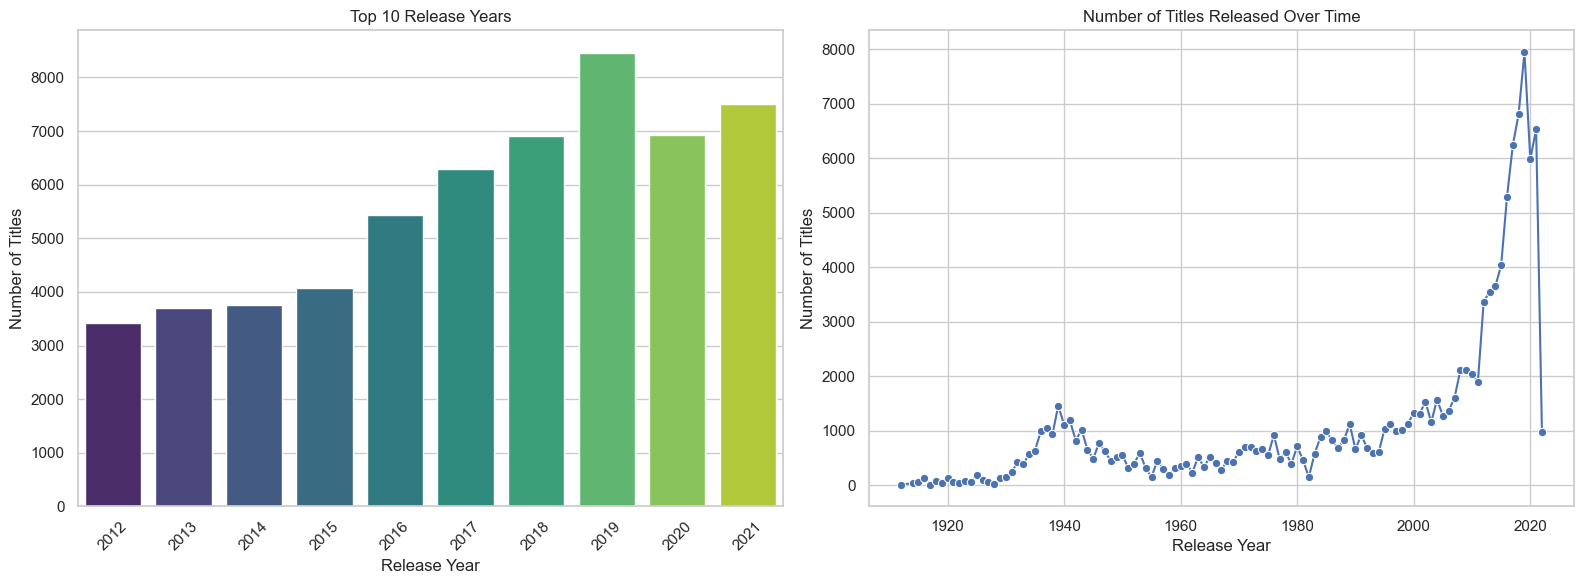

In [108]:
# Top 10 Release Years (Bar Plot Data)
top_release_years = dataset['release_year'].value_counts().sort_values(ascending=False).head(10)
print("Top 10 Release Years:")
print(top_release_years)

# Titles Released Over Time (Line Plot Data)
titles_per_year = df.groupby('release_year').size().reset_index(name='count')

# Set up the subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# -----------------------
# Plot 1: Barplot - Top 10 Release Years
# -----------------------
sns.barplot(x=top_release_years.index, y=top_release_years.values, palette="viridis", ax=axs[0])
axs[0].set_title("Top 10 Release Years")
axs[0].set_xlabel("Release Year")
axs[0].set_ylabel("Number of Titles")
axs[0].tick_params(axis='x', rotation=45)

# -----------------------
# Plot 2: Lineplot - Titles Released Over Time
# -----------------------
sns.lineplot(data=titles_per_year, x='release_year', y='count', marker='o', ax=axs[1])
axs[1].set_title("Number of Titles Released Over Time")
axs[1].set_xlabel("Release Year")
axs[1].set_ylabel("Number of Titles")

# Layout and display
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

_A line chart is best suited for visualizing trends over time. This chart clearly shows how the volume of content released has evolved year by year, allowing us to spot both growth periods and declines._

##### 2. What is/are the insight(s) found from the chart?

* _Consistent Growth: There has been a steady increase in the number of titles released, especially after the 2000s_

* _Peak in 2019: A notable spike is observed around 2019–2021, likely due to the digital streaming boom during the COVID-19 pandemic._

* _Sharp Drop in Recent Years: Post-2021, there is a sudden decline, which may be due to incomplete data for recent years or possible slowdowns in production._

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

_Yes, the insights support positive business impact. The rising trend in content releases reflects growing demand and platform expansion, justifying investment in content creation and marketing—especially by promoting underexposed titles from the pandemic spike._

_However, the post-2021 drop is concerning. If accurate, it may indicate production decline, market saturation, or budget constraints, potentially impacting engagement and revenue. This trend requires deeper analysis or data validation._

#### Chart - 12 - IMDb Score vs TMDb Score

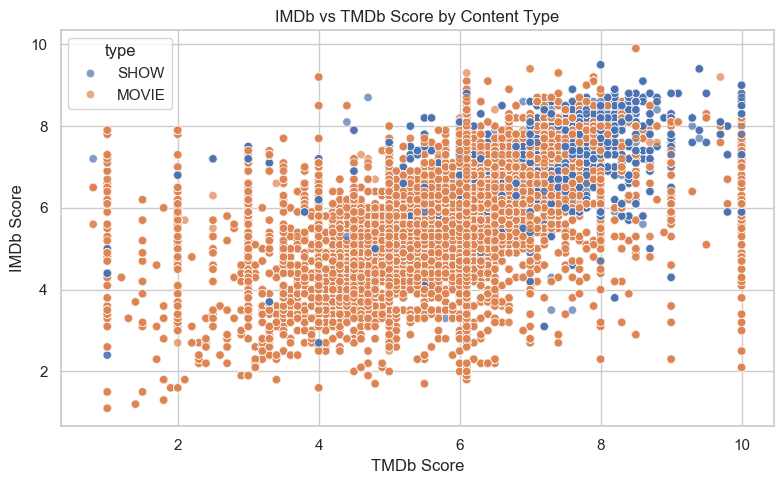

In [109]:
# Plotting IMDb Score vs TMDb Score
# ---------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='tmdb_score', y='imdb_score', hue='type', alpha=0.7)
plt.title("IMDb vs TMDb Score by Content Type")
plt.xlabel("TMDb Score")
plt.ylabel("IMDb Score")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

_Compare viewer attention (popularity) vs. viewer satisfaction (score)._

##### 2. What is/are the insight(s) found from the chart?

_Some content has high popularity but average IMDb score — indicates strong marketing or star power._

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

_A balance of high quality and visibility is needed — high popularity with poor scores may damage long-term brand trust._

#### Chart - 13 - Correlation Heatmap

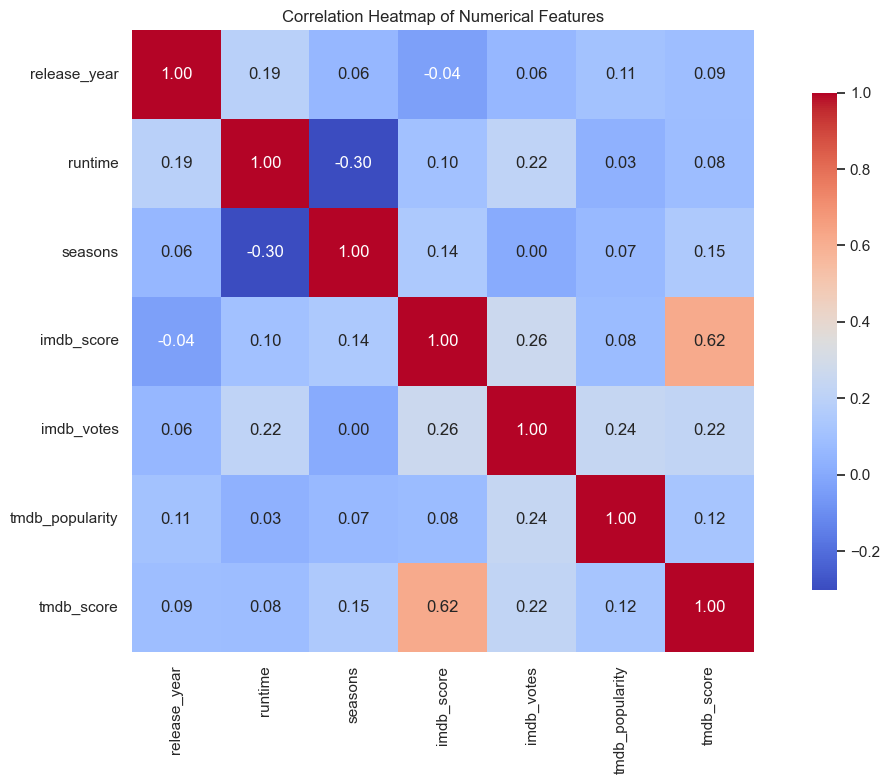

In [110]:
# Correlation heatmap visualization code
# ---------------------------
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

_The correlation heatmap was chosen because it visually highlights the strength and direction of relationships between numerical features. It’s an effective tool to:_

* _Identify strong positive or negative correlations_

* _Detect potential redundant features_

* _Support feature selection for machine learning models_

##### 2. What is/are the insight(s) found from the chart?

* _Spot strongly correlated features, which may indicate multicollinearity (e.g., seasons might correlate with runtime if TV shows tend to be shorter)._
* _Identify features that have little to no correlation with others, suggesting they might offer unique information._
* _Use these insights to reduce dimensionality or focus on the most informative features in model development._

#### Chart - 14 - Pair Plot

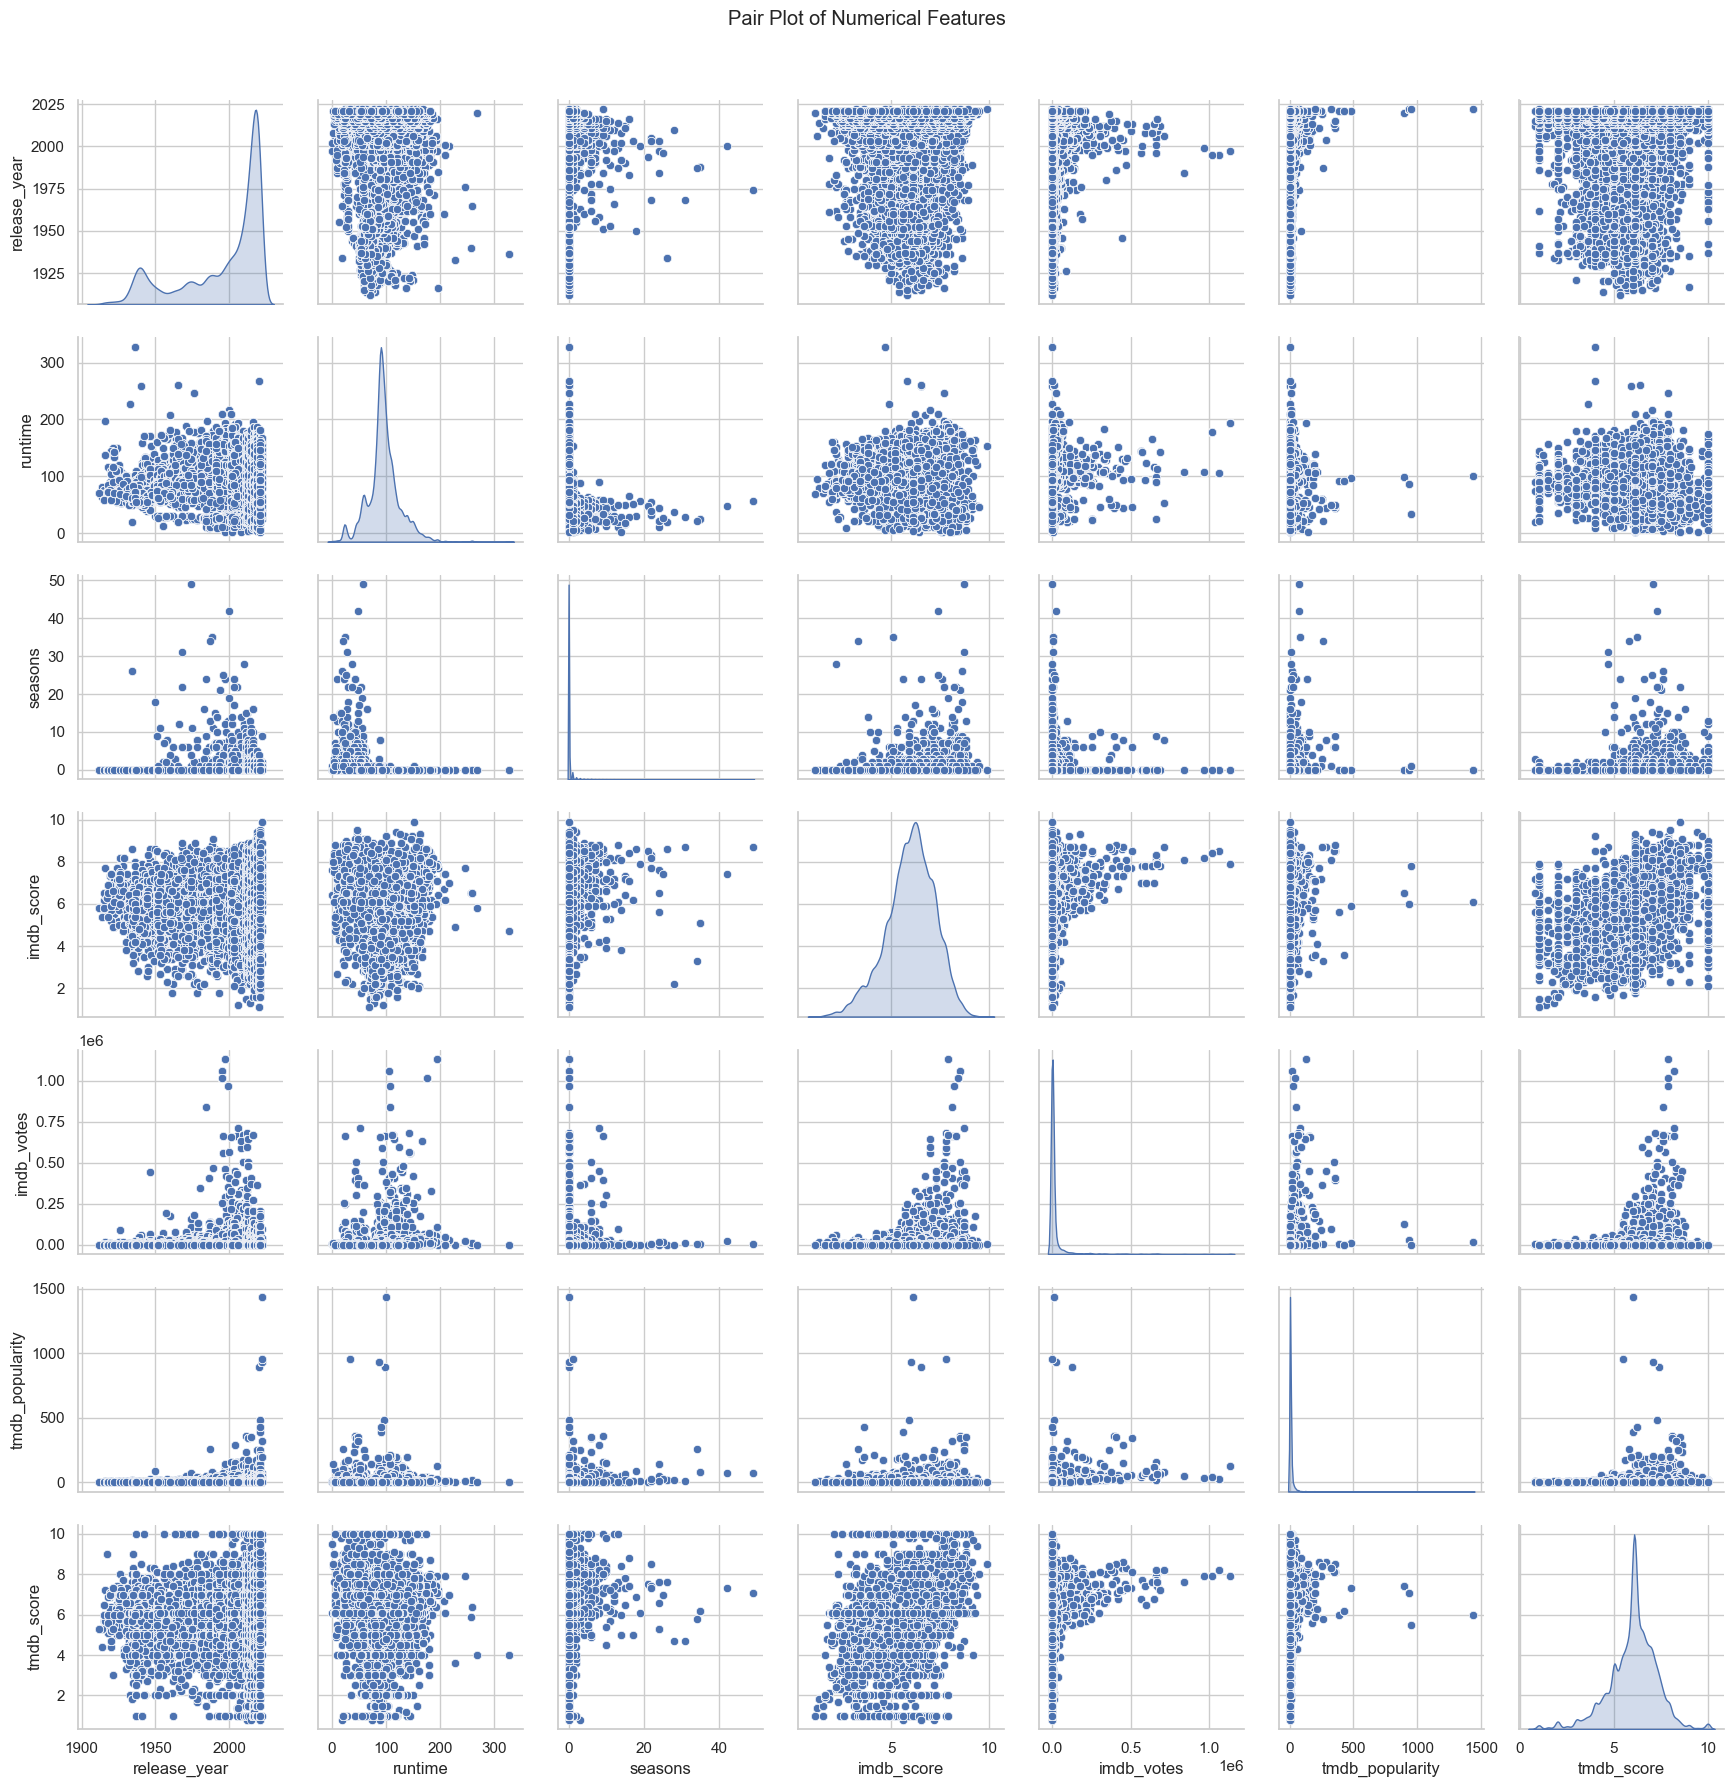

In [111]:
# Pair Plot visualization code
# ---------------------------

sns.pairplot(df, diag_kind='kde', markers='o', palette='rocket')
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

_The pair plot was chosen because:_

* _It provides a multi-dimensional view of how numerical features relate to each other._

* _It helps in detecting patterns, trends, clusters, or outliers visually._

* _It shows distribution (diagonal KDE) and pairwise relationships (scatterplots), all in one plot._

* _This makes it ideal for exploratory data analysis (EDA) before building predictive models._

##### 2. What is/are the insight(s) found from the chart?

* _You can visually spot correlations between certain variables (e.g., runtime and seasons may show trends)._

* _It reveals any non-linear relationships or separated clusters, which may hint at underlying patterns, like different content types (Movies vs TV Shows)._

* _Outliers in features like IMDb_score or runtime can be easily identified for further investigation._

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

### Based on the data analysis, here are the key recommendations for Amazon Prime:

1. Content Strategy
* Focus on producing more Drama, Comedy and Thriller content as they show highest engagement
* Expand children/family content (TV-Y, TV-G) which is currently underrepresented
* Consider investing in underserved genres like Sci-Fi and Documentaries to capture niche audiences

2. Regional Expansion
* Reduce over-dependence on US/UK content by increasing local productions in growing markets
* Focus on production partnerships in high-potential markets like India, Canada and France
* Develop region-specific content strategies based on local viewing preferences

3. Quality Management  
* Maintain quality standards as most content clusters between 6.0-7.5 IMDb ratings
* Focus on optimal runtime - 90-120 mins for movies, consistent episode lengths for shows
* Improve metadata quality, especially age certification data which has many "Not Rated" entries

4. Platform Growth
* Leverage recent content investment momentum (2019-2021 spike) for marketing
* Balance between movies (dominant) and TV shows to cater to binge-watchers
* Consider strategic partnerships in underrepresented genres and regions

5. User Experience
* Improve content tagging and categorization
* Enhance parental controls given the high proportion of mature content
* Create better content discovery features based on viewing patterns

# **Conclusion**

#### Based on the comprehensive data analysis of Amazon Prime's content library, here are the key findings and recommendations:

* _Content Distribution:_ Movies dominate over TV shows, with a strong focus on drama, comedy, and thrillers. Content is largely produced in the US and UK, with minimal representation of family or children’s programming.

* _Audience Quality Metrics:_ Most content holds a moderate IMDb rating (6.0–7.5). Movies typically run 90–120 minutes, while TV show runtimes vary widely, indicating a flexible content strategy.

* _Growth Pattern:_ A major surge in content occurred between 2019–2021, likely influenced by the pandemic. However, there's a noticeable decline post-2021, which may impact viewer engagement and platform growth.

* _Content Gaps:_ There is a lack of genre diversity and regional content. A high number of titles are missing proper metadata, including age certifications, which may hinder personalized recommendations and compliance.